In [1]:
from IPython.core.interactiveshell import import_item
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

base = '/content/COVID-19_Radiography_Dataset/'

In [2]:
folders = os.listdir(base)
print(folders)

['Normal', 'Lung_Opacity', 'COVID', 'Viral Pneumonia']


In [3]:
%%time

Data, Lables = [], []

for item in folders:
    new_path = os.path.join(base, item)
    new_path += '/images'
    for img in os.listdir(new_path):
        img_path = os.path.join(new_path, img)
        Data.append(np.array(cv2.resize(cv2.imread(img_path).astype('float32') / 255.0, (200,200))))
        Lables.append(folders.index(item))

CPU times: user 2min 1s, sys: 41.9 s, total: 2min 43s
Wall time: 1min 20s


In [4]:
x_train, x_test, y_train, y_test = train_test_split(Data, Lables, test_size = .2, random_state = 1)

In [5]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
vgg16 = keras.applications.vgg16.VGG16(input_shape = x_train[0].shape, weights = 'imagenet', include_top = False)

In [11]:
for layer in vgg16.layers:
  layer.trainable = False

In [12]:
x = keras.layers.Flatten()(vgg16.output)

In [13]:
prediction = keras.layers.Dense(len(folders), activation = 'softmax')(x)

In [17]:
model = keras.models.Model(vgg16.input, prediction)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
%%time
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
530/530 [==============================] - 4389s 8s/step - loss: 0.4105 - accuracy: 0.8466 - val_loss: 0.4481 - val_accuracy: 0.8313
Epoch 2/5
530/530 [==============================] - 4411s 8s/step - loss: 0.2557 - accuracy: 0.9071 - val_loss: 0.2835 - val_accuracy: 0.8923
Epoch 3/5
530/530 [==============================] - 4300s 8s/step - loss: 0.2219 - accuracy: 0.9197 - val_loss: 0.2613 - val_accuracy: 0.8984
Epoch 4/5
530/530 [==============================] - 4309s 8s/step - loss: 0.1954 - accuracy: 0.9303 - val_loss: 0.2465 - val_accuracy: 0.9100
Epoch 5/5
530/530 [==============================] - 4359s 8s/step - loss: 0.1700 - accuracy: 0.9412 - val_loss: 0.2672 - val_accuracy: 0.9081
CPU times: user 23h 5min 50s, sys: 10min 27s, total: 23h 16min 17s
Wall time: 6h 3min 23s


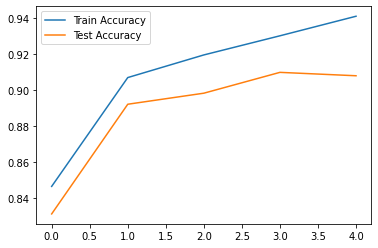

In [22]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.legend()
plt.show()

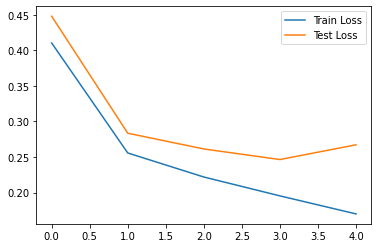

In [24]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()
plt.show()

In [25]:
model.evaluate(x_test, y_test)

133/133 [==============================] - 862s 6s/step - loss: 0.2672 - accuracy: 0.9081


[0.26722660660743713, 0.9081029891967773]